In [1]:
#Importing Needed Packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import cufflinks as cf
import yfinance as yf
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()
%matplotlib inline

In [2]:
#Reading CSV file as weather_df and making date_time column as index of dataframe
weather_df = pd.read_excel('TataData.xlsx', parse_dates=['Datetime'], index_col='Datetime')
weather_df.head(5)

,Batterie (V),Rayonnement global (j/cm²),Température (°C),ETo (mm),Humidité relative (%),Précipitation (mm),Vitesse du vent (km/h),Direction du vent (°),tempmax,tempmin,...,precip,precipprob,precipcover,windspeed,winddir,cloudcover,solarradiation,solarenergy,uvindex,conditions
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-06-22,6.76,2728.52,35.10,7.43,13.16,0.0,12.88,166.57,41.8,23.7,...,0.0,0,0.0,30.6,253.5,0.0,360.4,31.1,10,Clear
2012-06-23,6.76,1778.98,35.54,6.64,12.12,0.0,24.33,125.53,43.9,26.7,...,0.0,0,0.0,25.6,128.5,4.8,321.3,27.7,10,Clear
2012-06-24,6.73,1402.39,34.72,6.21,16.95,0.0,18.74,153.65,40.0,25.8,...,0.0,0,0.0,19.8,122.7,46.6,234.4,20.2,8,Partially cloudy
2012-06-25,6.76,1907.94,36.30,6.36,13.10,0.0,18.84,154.63,43.4,29.1,...,0.0,0,0.0,24.1,136.4,60.8,290.6,25.2,10,Partially cloudy
2012-06-26,6.76,2204.78,37.07,7.34,13.08,0.2,18.36,181.03,42.3,28.2,...,0.0,0,0.0,24.5,118.8,68.9,229.4,19.9,7,Partially cloudy


In [3]:
weather_df.describe()

,Batterie (V),Rayonnement global (j/cm²),Température (°C),ETo (mm),Humidité relative (%),Précipitation (mm),Vitesse du vent (km/h),Direction du vent (°),tempmax,tempmin,...,humidity,precip,precipprob,precipcover,windspeed,winddir,cloudcover,solarradiation,solarenergy,uvindex
count,3645.000000,2890.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,2890.000000,3653.000000,3653.000000,...,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,6.872137,2012.106471,24.747292,4.700938,12.504310,0.221838,14.061619,175.754765,31.285847,16.291185,...,31.356118,0.325185,9.690665,3.036340,25.859923,200.833014,23.397126,260.107446,22.458719,8.554065
std,0.125527,634.179410,8.347116,2.451765,8.537735,2.374180,5.575256,44.996052,8.699604,7.715334,...,14.532989,2.474187,29.587111,12.445926,8.294462,87.130450,26.764574,73.651711,6.346451,1.566924
min,6.440000,0.000000,7.300000,0.000000,1.840000,0.000000,3.670000,59.990000,6.900000,-1.500000,...,7.100000,0.000000,0.000000,0.000000,7.200000,27.100000,0.000000,51.200000,4.400000,2.000000
25%,6.790000,1482.915000,17.310000,2.700000,6.630000,0.000000,9.710000,141.210000,23.800000,9.500000,...,19.800000,0.000000,0.000000,0.000000,19.400000,124.100000,0.800000,193.600000,16.700000,7.000000
50%,6.860000,2017.585000,24.460000,4.390000,10.230000,0.000000,13.390000,172.345000,31.100000,15.800000,...,29.100000,0.000000,0.000000,0.000000,25.900000,198.400000,12.300000,265.200000,22.900000,9.000000
75%,6.960000,2564.585000,32.250000,6.570000,15.820000,0.000000,17.780000,211.145000,39.200000,22.700000,...,40.100000,0.000000,0.000000,0.000000,31.700000,286.400000,39.600000,325.900000,28.200000,10.000000
max,7.160000,3162.170000,41.900000,12.140000,82.780000,84.800000,39.080000,274.150000,46.900000,33.400000,...,87.700000,55.400000,100.000000,100.000000,58.700000,343.500000,97.700000,392.700000,32.900000,10.000000


In [4]:
MissingValues = weather_df.isnull()
Sum=MissingValues.sum()
Sum

Batterie (V)                    8
Rayonnement global (j/cm²)    763
Température (°C)                8
ETo (mm)                        8
Humidité relative (%)           8
Précipitation (mm)              8
Vitesse du vent (km/h)          8
Direction du vent (°)         763
tempmax                         0
tempmin                         0
temp                            0
feelslikemax                    0
feelslikemin                    0
feelslike                       0
dew                             0
humidity                        0
precip                          0
precipprob                      0
precipcover                     0
windspeed                       0
winddir                         0
cloudcover                      0
solarradiation                  0
solarenergy                     0
uvindex                         0
conditions                      0
dtype: int64

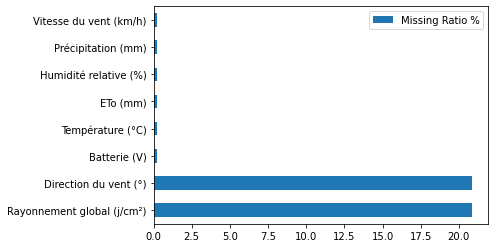

In [5]:
df=weather_df
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [6]:
weather_df['Batterie (V)'].fillna(value=6.872137, inplace=True)
weather_df['Rayonnement global (j/cm²)'].fillna(value=2012.106471, inplace=True)
weather_df['Température (°C)'].fillna(value=24.747292, inplace=True)
weather_df['ETo (mm)'].fillna(value=4.700938, inplace=True)
weather_df['Humidité relative (%)'].fillna(value=12.504310, inplace=True)
weather_df['Précipitation (mm)'].fillna(value=0.221838, inplace=True)
weather_df['Vitesse du vent (km/h)'].fillna(value=14.061619, inplace=True)
weather_df['Direction du vent (°)'].fillna(value=175.754765, inplace=True)

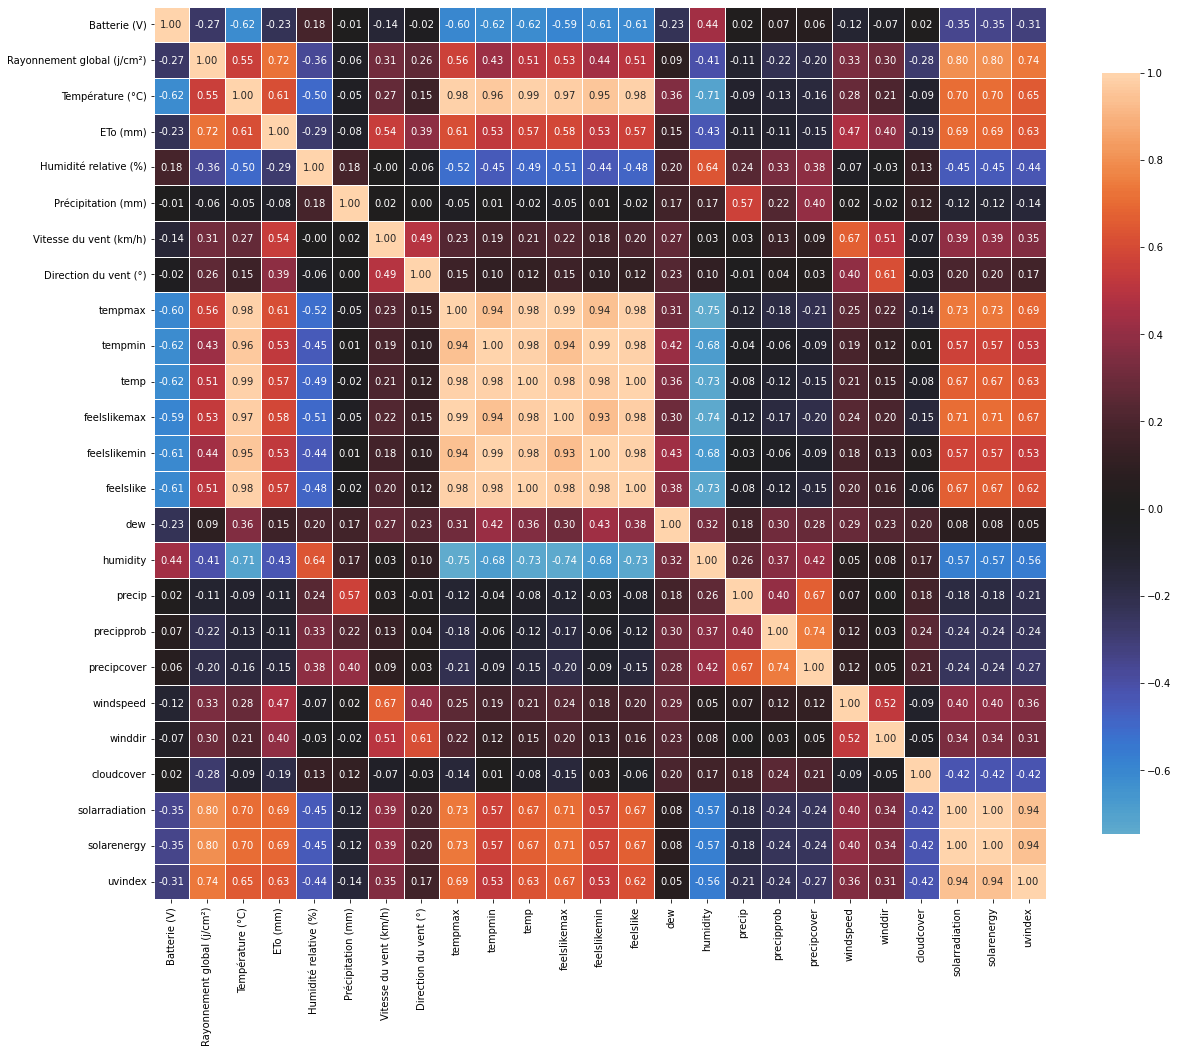

In [7]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(weather_df)

In [8]:
weather_df_num=weather_df.loc[:,['Précipitation (mm)','precip','precipcover']]


In [9]:
weather_df_num.head()

,Précipitation (mm),precip,precipcover
Datetime,,,
2012-06-22,0.0,0.0,0.0
2012-06-23,0.0,0.0,0.0
2012-06-24,0.0,0.0,0.0
2012-06-25,0.0,0.0,0.0
2012-06-26,0.2,0.0,0.0


In [10]:
#on va tester les 3 modules
#1- Multiple Linear Regression
#2- Decision Tree Regression
#3-  Random Forest Regression

In [11]:
weather_y=weather_df_num.pop("Précipitation (mm)")
weather_x=weather_df_num
weather_y

Datetime
2012-06-22     0.0
2012-06-23     0.0
2012-06-24     0.0
2012-06-25     0.0
2012-06-26     0.2
              ... 
2022-06-18     0.0
2022-06-19     0.0
2022-06-20     0.0
2022-06-21    14.5
2022-06-22     0.0
Name: Précipitation (mm), Length: 3653, dtype: float64

In [12]:
#Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.25,random_state=4)

In [13]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [14]:
prediction = model.predict(test_X)

In [15]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.31
R2-score: 0.42


In [16]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
Datetime,,,
2020-02-22,0.0,0.02,-0.02
2021-06-02,0.0,0.02,-0.02
2013-05-19,0.0,0.02,-0.02
2015-11-23,0.0,0.02,-0.02
2013-08-05,0.0,0.02,-0.02
...,...,...,...
2013-04-17,0.0,0.02,-0.02
2013-06-22,0.0,0.02,-0.02
2012-11-04,0.0,0.02,-0.02


<AxesSubplot:xlabel='Datetime'>

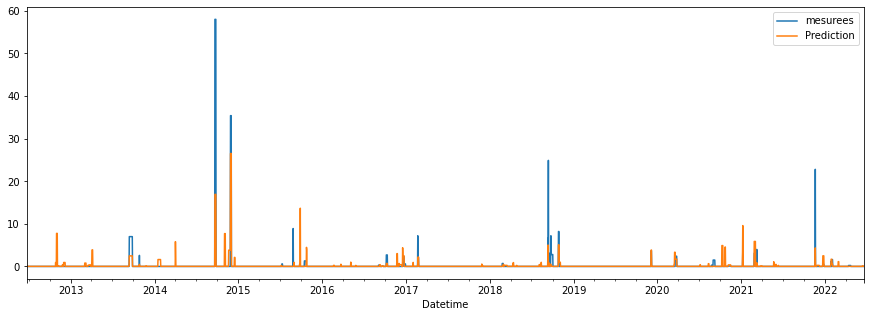

In [17]:
pd.DataFrame({'mesurees':test_y,'Prediction':prediction})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [18]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Multiple Linear Regression ',subplots=False)

In [19]:
#Decision Tree Regression

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [21]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

0.46814474175899695

In [22]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.47
R2-score: -0.94


In [23]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
Datetime,,,
2020-02-22,0.0,0.05,-0.05
2021-06-02,0.0,0.05,-0.05
2013-05-19,0.0,0.05,-0.05
2015-11-23,0.0,0.05,-0.05
2013-08-05,0.0,0.05,-0.05
...,...,...,...
2013-04-17,0.0,0.05,-0.05
2013-06-22,0.0,0.05,-0.05
2012-11-04,0.0,0.05,-0.05


<AxesSubplot:xlabel='Datetime'>

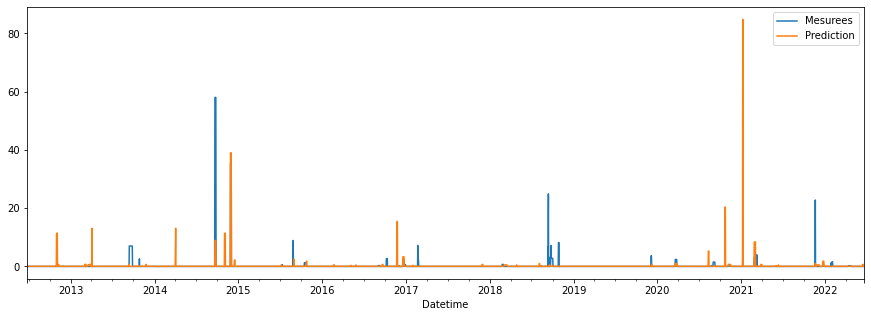

In [37]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction2})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [45]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction2})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Decision Tree Regression ',subplots=False)

In [39]:
#Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [41]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.3990108283122141

In [42]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.40
R2-score: -0.17


In [43]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
Datetime,,,
2020-02-22,0.0,0.05,-0.05
2021-06-02,0.0,0.05,-0.05
2013-05-19,0.0,0.05,-0.05
2015-11-23,0.0,0.05,-0.05
2013-08-05,0.0,0.05,-0.05
...,...,...,...
2013-04-17,0.0,0.05,-0.05
2013-06-22,0.0,0.05,-0.05
2012-11-04,0.0,0.05,-0.05


<AxesSubplot:xlabel='Datetime'>

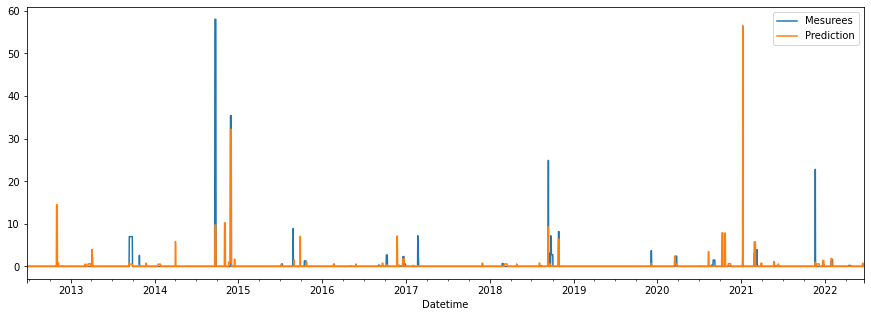

In [44]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction3})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [46]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction3})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Decision Tree Regression ',subplots=False)

In [47]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
poly_regr = PolynomialFeatures(degree = 2) # our polynomial model is of order
X_poly = poly_regr.fit_transform(train_X) # transforms the features to the polynomial form
polyReg = LinearRegression() # creates a linear regression object
polyReg.fit(X_poly, train_y) # fits the linear regression object to the polynomial features



LinearRegression()

In [48]:
prediction4=polyReg.predict(poly_regr.fit_transform(test_X))

In [49]:
for i in range(len(prediction4)):
  prediction4[i]=round(prediction4[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction4,'diff':(test_y-prediction4)})

,Actual,Prediction,diff
Datetime,,,
2020-02-22,0.0,0.05,-0.05
2021-06-02,0.0,0.05,-0.05
2013-05-19,0.0,0.05,-0.05
2015-11-23,0.0,0.05,-0.05
2013-08-05,0.0,0.05,-0.05
...,...,...,...
2013-04-17,0.0,0.05,-0.05
2013-06-22,0.0,0.05,-0.05
2012-11-04,0.0,0.05,-0.05


In [50]:
np.mean(np.absolute(prediction4-test_y))

0.33160139606127464

In [51]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction4 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction4 ) )

Mean absolute error: 0.33
R2-score: 0.47


<AxesSubplot:xlabel='Datetime'>

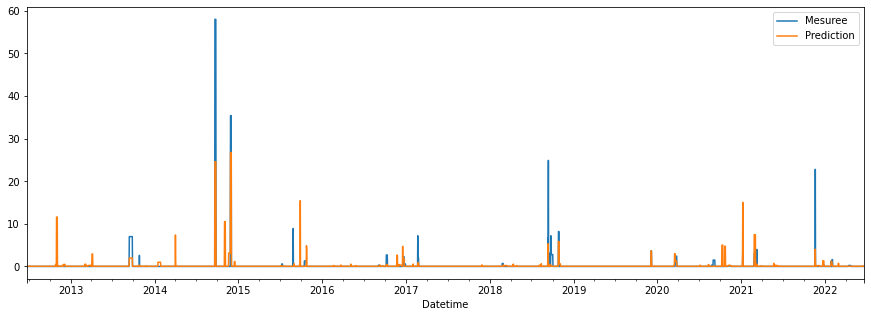

In [52]:
pd.DataFrame({'Mesuree':test_y,'Prediction':prediction4})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [53]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction4})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Polynomial Decision Tree Regression ',subplots=False)

In [56]:
#Comparaison des modeles

In [57]:
pd.DataFrame({'Valeur réelle':test_y,'MLR Model':prediction,'DTR Model':prediction2,'RFR Model':prediction3,'PR Model':prediction4})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Comparaison des predictions des modeles avec la valeur reelle mesuree ',subplots=False)

In [58]:
import requests
import json
response_API = requests.get('https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/tata%20maroc?unitGroup=metric&key=VSJTPURWV477GP6K5L8ZX8UWN&contentType=json')
df=response_API.json()
data=df['days']
data

[{'datetime': '2022-06-25',
  'datetimeEpoch': 1656111600,
  'tempmax': 37.2,
  'tempmin': 25.0,
  'temp': 31.0,
  'feelslikemax': 34.4,
  'feelslikemin': 25.0,
  'feelslike': 29.6,
  'dew': 6.9,
  'humidity': 23.4,
  'precip': 0.0,
  'precipprob': 0.0,
  'precipcover': 0.0,
  'preciptype': None,
  'snow': 0.0,
  'snowdepth': 0.0,
  'windgust': 26.6,
  'windspeed': 16.9,
  'winddir': 257.1,
  'pressure': 1007.0,
  'cloudcover': 0.0,
  'visibility': 24.1,
  'solarradiation': 371.5,
  'solarenergy': 32.1,
  'uvindex': 10.0,
  'severerisk': 10.0,
  'sunrise': '06:33:02',
  'sunriseEpoch': 1656135182,
  'sunset': '20:36:06',
  'sunsetEpoch': 1656185766,
  'moonphase': 0.95,
  'conditions': 'Clear',
  'description': 'Clear conditions throughout the day.',
  'icon': 'clear-day',
  'stations': ['remote'],
  'source': 'comb',
  'hours': [{'datetime': '00:00:00',
    'datetimeEpoch': 1656111600,
    'temp': 28.5,
    'feelslike': 27.2,
    'humidity': 24.7,
    'dew': 6.4,
    'precip': 0.0,
  

In [59]:
datetime=np.array([])
precip=np.array([])
precipcover=np.array([])
#'Précipitation (mm)','precip','precipcover'
for i in range(len(data)):
    datetime=np.append(datetime, data[i]['datetime'])
    precip=np.append(precip, data[i]['precip'])
    precipcover=np.append(precipcover, data[i]['precipcover'])

In [60]:
xc=pd.DataFrame({'datetime':datetime,'precip':precip,'precipcover':precipcover})

In [61]:
xc.set_index(['datetime'],inplace = True)
xc

,precip,precipcover
datetime,,
2022-06-25,0.0,0.0
2022-06-26,0.0,0.0
2022-06-27,0.0,0.0
2022-06-28,0.0,0.0
2022-06-29,0.0,0.0
2022-06-30,0.0,0.0
2022-07-01,0.0,0.0
2022-07-02,0.0,0.0
2022-07-03,0.0,0.0


In [62]:
prediction11 = model.predict(xc)
prediction22=regressor.predict(xc)
prediction33=regr.predict(xc)
prediction44=polyReg.predict(poly_regr.fit_transform(xc))

In [65]:
for i in range(len(prediction11)):
  prediction11[i]=round(prediction11[i],2)

for i in range(len(prediction22)):
  prediction22[i]=round(prediction22[i],2)

for i in range(len(prediction33)):
  prediction33[i]=round(prediction33[i],2)

for i in range(len(prediction44)):
  prediction44[i]=round(prediction44[i],2)

Predictions=pd.DataFrame({'datetime':datetime,'API VisualCrossing':precip,'MLR Model':prediction11,'DTR Model':prediction22,'RFR Model':prediction33,'PR Model':prediction44})
Predictions.set_index(['datetime'],inplace = True)
Predictions

,API VisualCrossing,MLR Model,DTR Model,RFR Model,PR Model
datetime,,,,,
2022-06-25,0.0,0.02,0.05,0.05,0.05
2022-06-26,0.0,0.02,0.05,0.05,0.05
2022-06-27,0.0,0.02,0.05,0.05,0.05
2022-06-28,0.0,0.02,0.05,0.05,0.05
2022-06-29,0.0,0.02,0.05,0.05,0.05
2022-06-30,0.0,0.02,0.05,0.05,0.05
2022-07-01,0.0,0.02,0.05,0.05,0.05
2022-07-02,0.0,0.02,0.05,0.05,0.05
2022-07-03,0.0,0.02,0.05,0.05,0.05


In [66]:
Predictions.fillna(method='pad').iplot(title='Comparaison des predictions',subplots=False)